In [253]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import scipy.sparse

In [254]:
data = pd.read_csv('paragraphs1.csv')

In [255]:
X = data['Paragraph Content']
y = data['Class']
data.rename(columns={'Paragraph Content': 'comment', 'Class': 'label'}, inplace=True)
X = data['comment']
y = data['label']



In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:
print(X_train.isnull().sum())
X_train = X_train.dropna()
X_train = X_train.fillna('')


3


In [258]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5))  # Utilisation de char_wb pour l'arabe
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [260]:
import numpy as np
import scipy.sparse
from sklearn.naive_bayes import MultinomialNB

# Vérifiez les dimensions de X_train_vect et y_train
print("Dimensions de X_train_vect:", X_train_vect.shape)
print("Dimensions de y_train:", y_train.shape)

# Si les dimensions ne correspondent pas, vérifiez les données d'origine
if X_train_vect.shape[0] != y_train.shape[0]:
    print("Les dimensions de X_train_vect et y_train ne correspondent pas.")
    # Vérifiez si X_train_vect et y_train sont bien associés

# Créez un masque pour les valeurs non-NaN dans y_train
mask = ~y_train.isnull()

# Assurez-vous que la longueur du masque est correcte
if mask.shape[0] != X_train_vect.shape[0]:
    print("La longueur du masque ne correspond pas au nombre de lignes dans X_train_vect.")
    print(f"Longueur du masque: {mask.shape[0]}, Nombre de lignes dans X_train_vect: {X_train_vect.shape[0]}")
else:
    # Appliquez le masque
    y_train_clean = y_train[mask]
    X_train_vect_clean = X_train_vect[mask]

    # Vérifiez les tailles après le nettoyage
    print("Taille de X_train_vect_clean après nettoyage:", X_train_vect_clean.shape)
    print("Taille de y_train_clean après nettoyage:", y_train_clean.shape)

    # Convertir en tableau dense si nécessaire (évitez les NaN)
    X_train_vect_clean = X_train_vect_clean.toarray()
    X_train_vect_clean = np.nan_to_num(X_train_vect_clean)
    X_train_vect_clean = scipy.sparse.csr_matrix(X_train_vect_clean)

    # Vérifiez les NaN après le nettoyage
    print("NaN values in X_train_vect_clean:", np.isnan(X_train_vect_clean.toarray()).sum())
    print("NaN values in y_train_clean:", y_train_clean.isnull().sum())





Dimensions de X_train_vect: (5, 1124)
Dimensions de y_train: (8,)
Les dimensions de X_train_vect et y_train ne correspondent pas.
La longueur du masque ne correspond pas au nombre de lignes dans X_train_vect.
Longueur du masque: 8, Nombre de lignes dans X_train_vect: 5


In [266]:
data.drop('ID', axis=1, inplace=True)
data.columns
data.head(20)

,comment,label
0,اشترك الآن في النشرة البريدية لجريدة هسبريس، ل...,['description']
1,NaN,['comment-success']
2,NaN,['comment-errors']
3,الاسم*,['comment-form-author']
4,البريد الإلكتروني*,['comment-form-email']
5,التعليق*,['comment-form-comment']
6,NaN,['form-submit']
7,‫‫من شروط النشر :عدم الإساءة للكاتب أو للأشخاص...,NaN
8,تربية الكلاب في المنزل مكروه الا ادا كان الرعي...,NaN
9,ولله في خلقه شؤون. الهواية اصبحت شيء ييعدنا عن...,NaN


<Axes: xlabel='comment'>

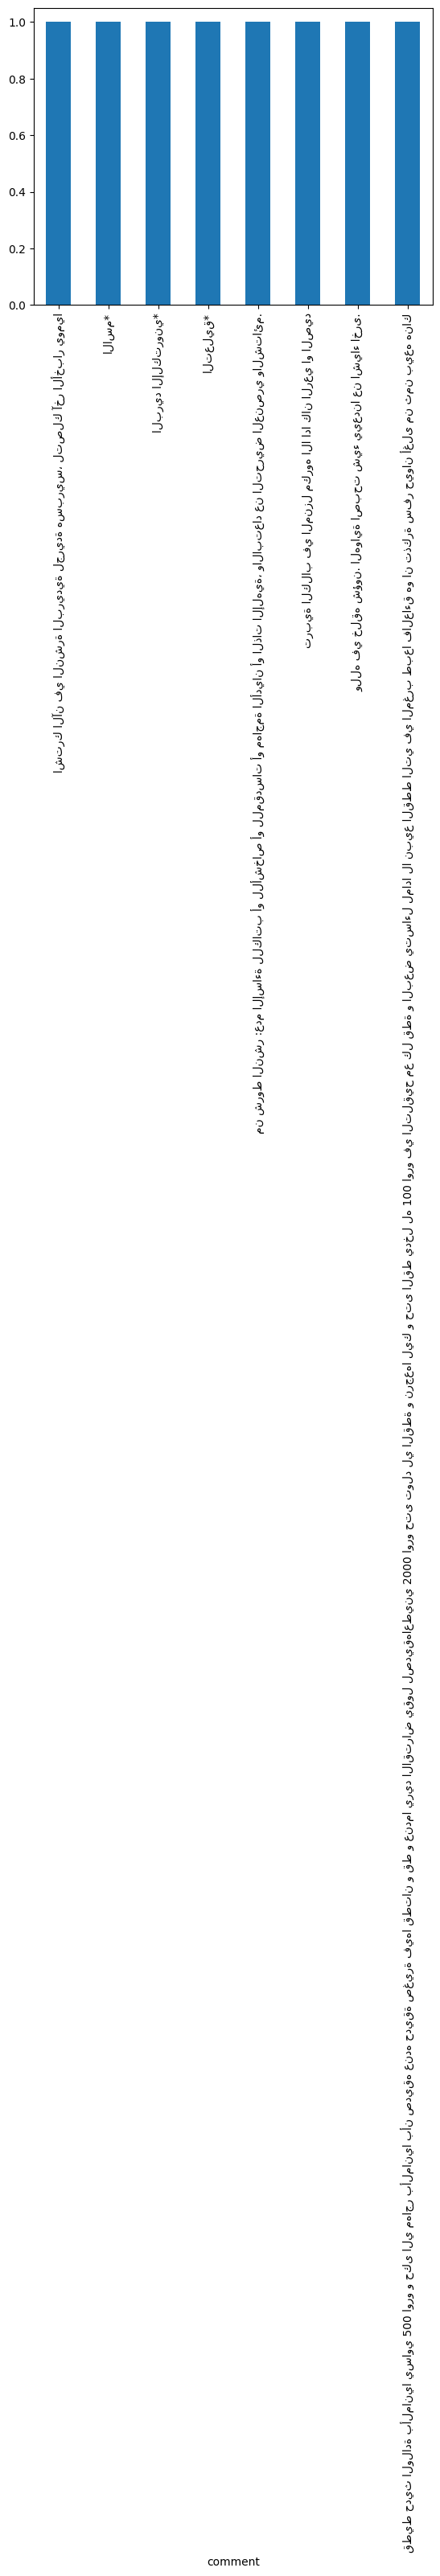

In [267]:
data['comment'].value_counts().plot(kind='bar')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  8 non-null      object 
 1   label    7 non-null      object 
 2   ID       0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 392.0+ bytes


In [268]:
data.columns

data.head(30)

,comment,label
0,اشترك الآن في النشرة البريدية لجريدة هسبريس، ل...,['description']
1,NaN,['comment-success']
2,NaN,['comment-errors']
3,الاسم*,['comment-form-author']
4,البريد الإلكتروني*,['comment-form-email']
5,التعليق*,['comment-form-comment']
6,NaN,['form-submit']
7,‫‫من شروط النشر :عدم الإساءة للكاتب أو للأشخاص...,NaN
8,تربية الكلاب في المنزل مكروه الا ادا كان الرعي...,NaN
9,ولله في خلقه شؤون. الهواية اصبحت شيء ييعدنا عن...,NaN


In [269]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vect_clean, y_train_clean)


MultinomialNB()

In [270]:
print("Unique labels in y_test:", np.unique(X_train_vect_clean))
print("Unique labels in y_pred:", np.unique(y_train_clean))

Unique labels in y_test: [<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1258 stored elements and shape (5, 1124)>        ]
Unique labels in y_pred: ["['comment-errors']" "['comment-form-author']" "['comment-form-email']"
 "['comment-success']" "['form-submit']"]


In [271]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to extract string from list-like string
def extract_string(x):
    if isinstance(x, str):
        # Remove brackets and quotes
        return x.strip("[]'\"")
    elif isinstance(x, list):
        return x[0] if x else np.nan
    else:
        return np.nan

# Apply the function to y_test and y_pred
y_test_clean = y_test.apply(extract_string)
y_pred_clean = np.array([extract_string(x) for x in y_pred])

# Remove any remaining NaN values
mask = ~y_test_clean.isnull()
y_test_clean = y_test_clean[mask]
y_pred_clean = y_pred_clean[mask]

# Get all unique labels from both y_test and y_pred
all_labels = np.unique(np.concatenate([y_test_clean, y_pred_clean]))

# Use LabelEncoder to convert strings to integers
le = LabelEncoder()
le.fit(all_labels)

y_test_encoded = le.transform(y_test_clean)
y_pred_encoded = le.transform(y_pred_clean)

# Now you can calculate accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test_encoded, y_pred_encoded))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded))

# Print unique values
print("Unique values in y_test:", np.unique(y_test_encoded))
print("Unique values in y_pred:", np.unique(y_pred_encoded))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Unique values in y_test: [1 3]
Unique values in y_pred: [0 2]


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [272]:
# Nettoyer les données en supprimant ou en remplissant les valeurs manquantes
X_clean = X.dropna().fillna('')

In [273]:
# Fonction pour extraire une chaîne de caractères à partir d'une liste ou d'une chaîne de caractères
def extract_string(x):
    if isinstance(x, str):
        return x.strip("[]'\"")
    elif isinstance(x, list):
        return x[0] if x else np.nan
    else:
        return np.nan

In [274]:
X_clean = X.dropna().fillna('')    
new_comments_vect = vectorizer.transform(X_clean.tolist())
predictions = model.predict(new_comments_vect)

In [275]:
# Liste des mots-clés négatifs
negative_keywords = ['والشتائم', 'مكروه', 'تحريض', 'العنصري']

# Fonction pour générer la réponse en fonction du commentaire
def generate_response(comment):
    # Vérifie si le commentaire contient un des mots-clés négatifs
    if any(keyword in comment for keyword in negative_keywords):
        return "0"  # Commentaire négatif
    else:
        return "1"  # Commentaire positif

In [168]:
# def generate_response(comment, sentiment):
#     if sentiment == 'negative':
#         return "نأسف لسماع أنك غير راضٍ عن المنتج. يرجى التواصل مع الدعم للحصول على المساعدة."
#     else:
#         return "شكرًا لك على ملاحظاتك الإيجابية!"

In [276]:
for comment, sentiment in zip(X_clean.tolist(), predictions):
    response = generate_response(comment)
    print(f"Commentaire: {comment}\nRéponse: {response}\n")

Commentaire: اشترك الآن في النشرة البريدية لجريدة هسبريس، لتصلك آخر الأخبار يوميا
Réponse: 1

Commentaire: الاسم*
Réponse: 1

Commentaire: البريد الإلكتروني*
Réponse: 1

Commentaire: التعليق*
Réponse: 1

Commentaire: ‫‫من شروط النشر :عدم الإساءة للكاتب أو للأشخاص أو للمقدسات أو مهاجمة الأديان أو الذات الإلهية، والابتعاد عن التحريض العنصري والشتائم‬.
Réponse: 0

Commentaire: تربية الكلاب في المنزل مكروه الا ادا كان الرعي او الصيد
Réponse: 0

Commentaire: ولله في خلقه شؤون. الهواية اصبحت شيء ييعدنا عن اشياء اخرى.
Réponse: 1

Commentaire: قطيط حديث الولادة بألمانيا يساوي 500 اورو و حكى الي مهاجر بألمانيا بأن صديقه عنده حديقة صغيرة فيها قطتان و قط و عندما يريد الاقتراض يقول لصديقهاعطيني 2000 اورو حتى تولد لي القطة و نرجعها ليك و حتى القط يدخل له 100 اورو في التلقيح مع كل قطة و البعض يتساءل لمادا لا نبيع القطط التي في المغرب طبعا فالعاءق هو ان تذكرة سفر حيوان أغلى من ثمن بيعه هناك
Réponse: 1

